In [1]:
import os
import sys

current_path = os.getcwd()
sys.path.append(current_path + '\..\project1')

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

# Import self-made modules
from linear_model import LinearModel
from make_and_prepare_data import FrankeFunction, create_design_matrix
from model_selection import R2, MSE, cross_validation

# Import plotting functions
from plotting import plot_mse_per_poldegree, plot_R2_per_poldegree

In [2]:
# Choose hyperparameters for model
pol_degree = 7
data_size = 200
test_size = 0.2
error_std = 0
save_fig = False

In [6]:
# Make data
np.random.seed(4)

x = np.random.uniform(0, 1, data_size)
y = np.random.uniform(0, 1, data_size)

z = FrankeFunction(x, y) + np.random.normal(scale = error_std, size = data_size)

In [7]:
# Define empty list in which to store the MSE and R2 errors
mses = []
mses_train = []
r2s = []
r2s_train = []
mses_train_ridge = []
mses_test_ridge = []


# Train and test model for different polynomial derees
for i in range(1, pol_degree+1):
    X = create_design_matrix(x, y, i)
    
    # Split data in train and test
    X_train, X_test, z_train, z_test = train_test_split(X, z, test_size = test_size)
    
    # Train model
    lr = LinearModel()
    lr.fit(X_train, z_train)
    
    # Made predictions on train and test set
    z_pred_test = lr.predict(X_test)
    z_pred_train = lr.predict(X_train)
    
    # Calculate errors for test set
    mses.append(MSE(z_test, z_pred_test))
    r2s.append(R2(z_test, z_pred_test))
    
    # Calculate errors for train set
    mses_train.append(MSE(z_train, z_pred_train))
    r2s_train.append(R2(z_train, z_pred_train)) 
    
    lr_ridge = LinearModel(regr_type='ridge', lamb=0.2)
    lr_ridge.fit(X_train, z_train)
    
    z_pred_test_ridge = lr_ridge.predict(X_test)
    z_pred_train_ridge = lr_ridge.predict(X_train)
    
    # Calculate errors for test set
    mses_train_ridge.append(MSE(z_train, z_pred_train_ridge))
    mses_test_ridge.append(MSE(z_test, z_pred_test_ridge))
    

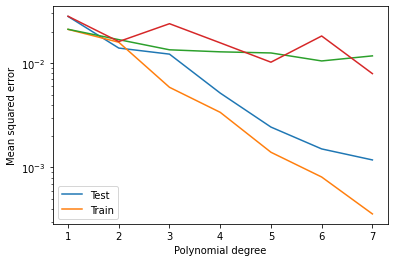

In [9]:
# Plot MSE
plot_mse_per_poldegree(mses_train, mses, pol_degree=pol_degree, save_plot = save_fig, save_title = 'OLS_MSE_n=' + str(data_size) + ', sigma=' + str(error_std))
# Plot MSE
plt.plot(range(1, 8), mses_train_ridge)
plt.plot(range(1, 8), mses_test_ridge)